In [1]:
import pandas as pd
csv_file_name = 'nasas fireballs.csv'
nfb = pd.read_csv(csv_file_name)
nfb.head()

,date/time for peak brightness,latitude,longitude,altitude(km),velocity(km/s),velocity in x direction,velocity in y direction,velocity in z direction,radiated energy,total impact energy
0,2022-04-21 22:15:28,55.5S,68.9W,28.4,1.270000e+01,-4.200,11.6,3.2,3.900000e+10,0.130
1,2022-04-12 21:59:12,8.2S,57.8E,23.8,2.060000e+01,-19.300,-6.3,3.6,5.200000e+10,0.170
2,2022-04-04 00:30:39,3.2S,64.3W,31.5,1.970000e+01,-17.600,5.3,-7.2,2.700000e+10,0.095
3,2022-03-30 18:19:18,45.9S,171.4W,74.0,2.000000e+10,0.073,NaN,NaN,NaN,NaN
4,2022-03-28 10:20:24,7.7S,74.3E,29.0,1.960000e+01,-16.600,-10.4,0.1,3.780000e+11,0.980


In [10]:
nfb['date'] = pd.to_datetime(nfb['date/time for peak brightness'])
nfb[['latitude', 'longitude']].head()

,latitude,longitude
0,55.5S,68.9W
1,8.2S,57.8E
2,3.2S,64.3W
3,45.9S,171.4W
4,7.7S,74.3E


In [ ]:
'''ArithmeticErrorlatitude	longitude
0	55.5S	68.9W
1	8.2S	57.8E
2	3.2S	64.3W
3	45.9S	171.4W'''
def convert_latlon(s):
    direction = s[-1]
    num = float(s[:-1])
    if direction in ['S', 'W']:
        num *= -1
    return num
nfb['lat_deg'] = nfb['latitude'].apply(lambda s: convert_latlon(s))
nfb['lon_deg'] = nfb['longitude'].apply(lambda s: convert_latlon(s))

<Axes: title={'center': 'Radiated energy vs date'}, xlabel='date'>

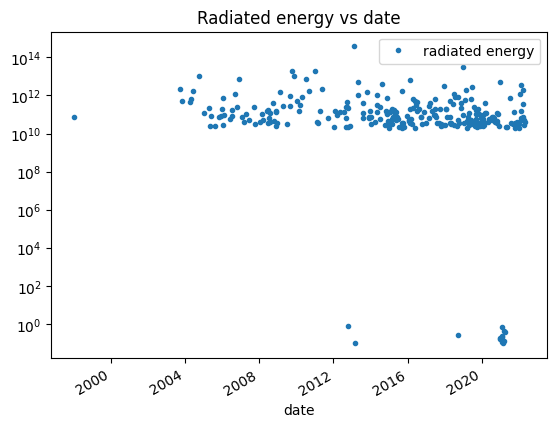

In [5]:
nfb.plot(x='date', y='radiated energy', style='.', logy=True, title='Radiated energy vs date')

<Axes: title={'center': 'Radiated energy vs altitude'}, xlabel='altitude(km)'>

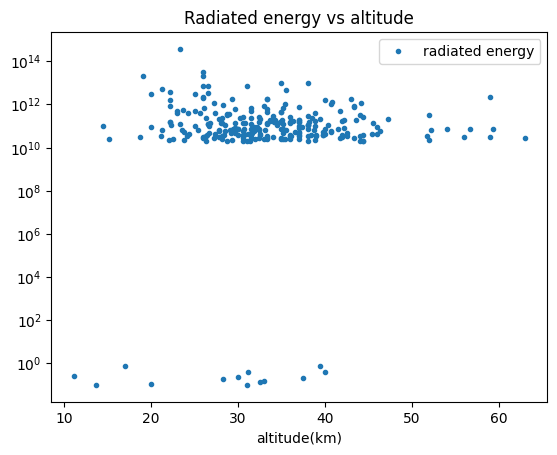

In [6]:
nfb.plot(x='altitude(km)', y='radiated energy', style='.', logy=True, title='Radiated energy vs altitude')

<Axes: title={'center': 'Radiated energy vs velocity'}, xlabel='velocity(km/s)'>

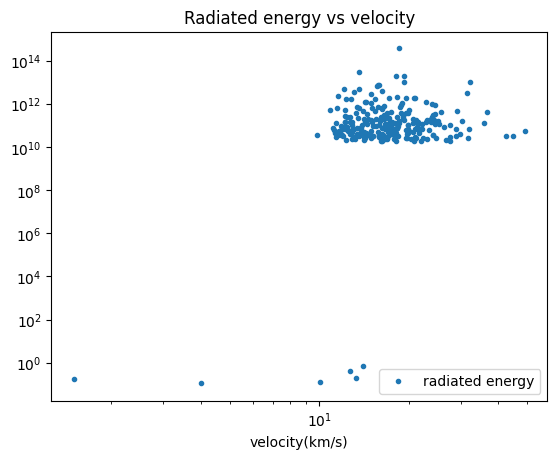

In [8]:
nfb.plot(x='velocity(km/s)', y='radiated energy', style='.', logy=True, logx=True, title='Radiated energy vs velocity')

In [9]:
nfb.corr(numeric_only=True)

ValueError: could not convert string to float: '2022-04-21 22:15:28'